# A1 - Predicting Car Prices

## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

# 1. Load data

In [2]:
df = pd.read_csv('Cars.csv')

In [3]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
# Check the shape of your data - This mean you have 12 feature and 1 label
df.shape

(8128, 13)

In [5]:
# Check Statistical info
df.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [6]:
# Check Dtypes of your input data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [7]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

# 2. Exploratory Data Analysis

In [8]:
df_eda = df.copy()

## Renaming

In [9]:
# Renaming 
df_eda.rename(columns = {
        'name':'brand'}, inplace = True)
df_eda.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

## Mapping owner 

In [10]:
df_eda["owner"].unique() 

array(['First Owner', 'Second Owner', 'Third Owner',
       'Fourth & Above Owner', 'Test Drive Car'], dtype=object)

In [11]:
mapping = {
    'First Owner' : 1,
    'Second Owner' : 2,
    'Third Owner' : 3,
    'Fourth & Above Owner': 4,
    'Test Drive Car' : 5,
}

df_eda['owner'] = df_eda['owner'].map(mapping)

In [12]:
df_eda["owner"].unique() 

array([1, 2, 3, 4, 5])

## Remove row in fuel with CNG and LPG

In [13]:
df_eda["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

In [14]:
df_eda = df_eda[~df_eda['fuel'].str.contains('CNG|LPG')]

In [15]:
df_eda["fuel"].value_counts()

fuel
Diesel    4402
Petrol    3631
Name: count, dtype: int64

## In mileage (Remove "kmpl" unit in the data and convert to numberic type)

In [16]:
df_eda["mileage"].unique() 

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '23.59 kmpl', '20.0 kmpl', '19.01 kmpl', '17.3 kmpl',
       '19.3 kmpl', nan, '18.9 kmpl', '18.15 kmpl', '24.52 kmpl',
       '19.7 kmpl', '22.54 kmpl', '21.0 kmpl', '25.5 kmpl', '26.59 kmpl',
       '21.5 kmpl', '20.3 kmpl', '21.4 kmpl', '24.7 kmpl', '18.2 kmpl',
       '16.8 kmpl', '24.3 kmpl', '14.0 kmpl', '18.6 kmpl', '23.95 kmpl',
       '17.0 kmpl', '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl',
       '18.5 kmpl', '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl',
       '26.0 kmpl', '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl', '16.47 kmpl', '15.04 kmpl',
      

In [17]:
# Remove 'kmpl' from the 'mileage' column
df_eda['mileage'] = df_eda['mileage'].str.replace(' kmpl', '', regex=True)
df_eda["mileage"].unique() 

array(['23.4', '21.14', '17.7', '23.0', '16.1', '20.14', '23.59', '20.0',
       '19.01', '17.3', '19.3', nan, '18.9', '18.15', '24.52', '19.7',
       '22.54', '21.0', '25.5', '26.59', '21.5', '20.3', '21.4', '24.7',
       '18.2', '16.8', '24.3', '14.0', '18.6', '23.95', '17.0', '20.63',
       '13.93', '16.0', '17.8', '18.5', '12.55', '12.99', '14.8', '13.5',
       '26.0', '20.65', '27.3', '11.36', '17.68', '14.28', '18.53',
       '14.84', '21.12', '20.36', '21.27', '18.16', '22.0', '25.1',
       '20.51', '21.66', '25.2', '22.9', '16.02', '20.54', '22.77',
       '15.71', '23.1', '19.02', '19.81', '16.47', '15.04', '19.1',
       '21.79', '18.8', '21.21', '15.37', '11.79', '19.0', '14.3', '15.8',
       '15.1', '19.09', '22.32', '21.9', '14.53', '21.63', '20.85',
       '20.45', '19.67', '23.01', '20.77', '17.92', '17.01', '22.37',
       '19.33', '9.5', '12.83', '22.48', '16.78', '14.67', '15.0',
       '13.96', '18.0', '12.07', '26.21', '10.8', '16.3', '13.6', '14.74',
       '

In [18]:
# Convert things in 'mileage' column into numeric & Nothing into NaN (Not a Number)
df_eda['mileage'] = pd.to_numeric(df_eda['mileage'], errors='coerce')
df_eda["mileage"].dtype

dtype('float64')

## In engine column (Remove "CC" amd convert column into numerical type)

In [19]:
df_eda["engine"].unique() 

array(['1248 CC', '1498 CC', '1497 CC', '1396 CC', '1298 CC', '1197 CC',
       '796 CC', '1364 CC', '1399 CC', '1461 CC', '993 CC', nan,
       '1061 CC', '1198 CC', '1199 CC', '998 CC', '1591 CC', '2179 CC',
       '1368 CC', '2982 CC', '2494 CC', '2143 CC', '2477 CC', '1462 CC',
       '2755 CC', '1968 CC', '1798 CC', '1196 CC', '1373 CC', '1598 CC',
       '1998 CC', '1086 CC', '1194 CC', '1172 CC', '1405 CC', '1582 CC',
       '999 CC', '2487 CC', '1999 CC', '3604 CC', '2987 CC', '1995 CC',
       '1451 CC', '1969 CC', '2967 CC', '2497 CC', '1797 CC', '1991 CC',
       '2362 CC', '1493 CC', '1599 CC', '1341 CC', '1794 CC', '799 CC',
       '1193 CC', '2696 CC', '1495 CC', '1186 CC', '1047 CC', '2498 CC',
       '2956 CC', '2523 CC', '1120 CC', '624 CC', '1496 CC', '1984 CC',
       '2354 CC', '814 CC', '793 CC', '1799 CC', '936 CC', '1956 CC',
       '1997 CC', '1499 CC', '1948 CC', '2997 CC', '2489 CC', '2499 CC',
       '2609 CC', '2953 CC', '1150 CC', '1994 CC', '1388 CC', '152

In [20]:
# Remove 'CC' from the 'engine' column
df_eda['engine'] = df_eda['engine'].str.replace('CC', '', regex=True)
df_eda["engine"].unique() 

array(['1248 ', '1498 ', '1497 ', '1396 ', '1298 ', '1197 ', '796 ',
       '1364 ', '1399 ', '1461 ', '993 ', nan, '1061 ', '1198 ', '1199 ',
       '998 ', '1591 ', '2179 ', '1368 ', '2982 ', '2494 ', '2143 ',
       '2477 ', '1462 ', '2755 ', '1968 ', '1798 ', '1196 ', '1373 ',
       '1598 ', '1998 ', '1086 ', '1194 ', '1172 ', '1405 ', '1582 ',
       '999 ', '2487 ', '1999 ', '3604 ', '2987 ', '1995 ', '1451 ',
       '1969 ', '2967 ', '2497 ', '1797 ', '1991 ', '2362 ', '1493 ',
       '1599 ', '1341 ', '1794 ', '799 ', '1193 ', '2696 ', '1495 ',
       '1186 ', '1047 ', '2498 ', '2956 ', '2523 ', '1120 ', '624 ',
       '1496 ', '1984 ', '2354 ', '814 ', '793 ', '1799 ', '936 ',
       '1956 ', '1997 ', '1499 ', '1948 ', '2997 ', '2489 ', '2499 ',
       '2609 ', '2953 ', '1150 ', '1994 ', '1388 ', '1527 ', '2199 ',
       '995 ', '2993 ', '1586 ', '1390 ', '909 ', '2393 ', '3198 ',
       '1339 ', '2835 ', '2092 ', '1595 ', '2496 ', '1596 ', '1597 ',
       '2596 ', '2148 ', '

In [21]:
# Convert things in 'engine' column into numeric & Nothing into NaN (Not a Number)
df_eda['engine'] = pd.to_numeric(df_eda['engine'], errors='coerce')
df_eda["engine"].dtype

dtype('float64')

## max_power column (Remove unit and Change to numberic)

In [22]:
df_eda["max_power"].unique() 

array(['74 bhp', '103.52 bhp', '78 bhp', '90 bhp', '88.2 bhp',
       '81.86 bhp', '37 bhp', '67.1 bhp', '68.1 bhp', '108.45 bhp',
       '60 bhp', '73.9 bhp', nan, '67 bhp', '82 bhp', '88.5 bhp',
       '46.3 bhp', '88.73 bhp', '64.1 bhp', '98.6 bhp', '88.8 bhp',
       '83.81 bhp', '83.1 bhp', '47.3 bhp', '73.8 bhp', '34.2 bhp',
       '35 bhp', '81.83 bhp', '121.3 bhp', '138.03 bhp', '160.77 bhp',
       '117.3 bhp', '116.3 bhp', '83.14 bhp', '67.05 bhp', '168.5 bhp',
       '100 bhp', '120.7 bhp', '98.63 bhp', '175.56 bhp', '103.25 bhp',
       '171.5 bhp', '100.6 bhp', '174.33 bhp', '187.74 bhp', '170 bhp',
       '78.9 bhp', '88.76 bhp', '86.8 bhp', '108.495 bhp', '108.62 bhp',
       '93.7 bhp', '103.6 bhp', '98.59 bhp', '189 bhp', '67.04 bhp',
       '68.05 bhp', '82.85 bhp', '81.80 bhp', '73 bhp', '120 bhp',
       '94.68 bhp', '160 bhp', '65 bhp', '155 bhp', '69.01 bhp',
       '126.32 bhp', '138.1 bhp', '83.8 bhp', '126.2 bhp', '98.96 bhp',
       '62.1 bhp', '86.7 bhp', '18

In [23]:
# Remove 'bhp' from the 'max_power' column
df_eda['max_power'] = df_eda['max_power'].str.replace('bhp', '', regex=True)
df_eda["max_power"].unique() 

array(['74 ', '103.52 ', '78 ', '90 ', '88.2 ', '81.86 ', '37 ', '67.1 ',
       '68.1 ', '108.45 ', '60 ', '73.9 ', nan, '67 ', '82 ', '88.5 ',
       '46.3 ', '88.73 ', '64.1 ', '98.6 ', '88.8 ', '83.81 ', '83.1 ',
       '47.3 ', '73.8 ', '34.2 ', '35 ', '81.83 ', '121.3 ', '138.03 ',
       '160.77 ', '117.3 ', '116.3 ', '83.14 ', '67.05 ', '168.5 ',
       '100 ', '120.7 ', '98.63 ', '175.56 ', '103.25 ', '171.5 ',
       '100.6 ', '174.33 ', '187.74 ', '170 ', '78.9 ', '88.76 ', '86.8 ',
       '108.495 ', '108.62 ', '93.7 ', '103.6 ', '98.59 ', '189 ',
       '67.04 ', '68.05 ', '82.85 ', '81.80 ', '73 ', '120 ', '94.68 ',
       '160 ', '65 ', '155 ', '69.01 ', '126.32 ', '138.1 ', '83.8 ',
       '126.2 ', '98.96 ', '62.1 ', '86.7 ', '188 ', '214.56 ', '177 ',
       '280 ', '148.31 ', '254.79 ', '190 ', '177.46 ', '204 ', '141 ',
       '117.6 ', '241.4 ', '282 ', '150 ', '147.5 ', '108.5 ', '103.5 ',
       '183 ', '181.04 ', '157.7 ', '164.7 ', '91.1 ', '400 ', '68 ',
     

In [24]:
# Convert things in 'max_power' column into numeric & Nothing into NaN (Not a Number)
df_eda['max_power'] = pd.to_numeric(df_eda['max_power'], errors='coerce')
df_eda["max_power"].dtype

dtype('float64')

## Brand Column (Take only the first word and remove the rest)

In [25]:
df_eda['brand'].value_counts()

brand
Maruti Swift Dzire VDI          129
Maruti Alto 800 LXI              82
Maruti Alto LXi                  71
BMW X4 M Sport X xDrive20d       62
Maruti Swift VDI                 61
                               ... 
Maruti Celerio ZXI AMT BSIV       1
Chevrolet Cruze LT                1
Ford Fiesta 1.4 Duratorq EXI      1
Honda City ZXi AT                 1
Hyundai i20 Sportz Diesel         1
Name: count, Length: 2018, dtype: int64

In [26]:
df_eda['brand'] = df_eda['brand'].str.split().str[0]
df_eda['brand'].unique() 

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

## Remove the torque column

In [27]:
#Remove the colummn (Axis =1)
df_eda.drop('torque', axis=1, inplace=True)

In [28]:
df_eda.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'seats'],
      dtype='object')

## Remove the test drive car in the owner column

In [29]:
df_eda['owner'].value_counts()

owner
1    5238
2    2073
3     547
4     170
5       5
Name: count, dtype: int64

In [30]:
#Remove the test drive car (Already map it as 5)
df_eda = df_eda[df_eda['owner'] != 5]
df_eda['owner'].unique() 


array([1, 2, 3, 4])

In [31]:
df_eda['owner'].value_counts()

owner
1    5238
2    2073
3     547
4     170
Name: count, dtype: int64

## Label encoding

In [32]:
df_eda.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage          float64
engine           float64
max_power        float64
seats            float64
dtype: object

### Group brand

In [33]:
df_eda['brand'].unique()

array(['Maruti', 'Skoda', 'Honda', 'Hyundai', 'Toyota', 'Ford', 'Renault',
       'Mahindra', 'Tata', 'Chevrolet', 'Fiat', 'Datsun', 'Jeep',
       'Mercedes-Benz', 'Mitsubishi', 'Audi', 'Volkswagen', 'BMW',
       'Nissan', 'Lexus', 'Jaguar', 'Land', 'MG', 'Volvo', 'Daewoo',
       'Kia', 'Force', 'Ambassador', 'Ashok', 'Isuzu', 'Opel', 'Peugeot'],
      dtype=object)

In [34]:
#Divide brand into 2 group (Luxury and Mass-Market)
brand_groups = {
    'Jeep': 'Luxury', 'Mercedes-Benz': 'Luxury', 'Audi': 'Luxury', 'Volkswagen': 'Luxury', 
    'BMW': 'Luxury', 'Lexus': 'Luxury', 'Jaguar': 'Luxury', 'Land': 'Luxury', 'Volvo': 'Luxury', 
    'Opel': 'Luxury',
    'Maruti': 'Mass-Market', 'Skoda': 'Mass-Market', 'Honda': 'Mass-Market', 'Hyundai': 'Mass-Market', 
    'Toyota': 'Mass-Market', 'Ford': 'Mass-Market', 'Renault': 'Mass-Market', 'Mahindra': 'Mass-Market', 
    'Tata': 'Mass-Market', 'Chevrolet': 'Mass-Market', 'Fiat': 'Mass-Market', 'Datsun': 'Mass-Market', 
    'Mitsubishi': 'Mass-Market', 'Nissan': 'Mass-Market', 'MG': 'Mass-Market', 'Kia': 'Mass-Market',
    'Force' : 'Mass-Market', 'Ambassador': 'Mass-Market', 'Ashok': 'Mass-Market',
    'Daewoo': 'Mass-Market', 'Isuzu': 'Mass-Market', 'Peugeot': 'Mass-Market'}

# Map brand names with their group
df_eda['brand'] = df_eda['brand'].map(brand_groups)

# Display the DataFrame
df_eda['brand'].unique()

array(['Mass-Market', 'Luxury'], dtype=object)

In [35]:
df_eda['brand']

0       Mass-Market
1       Mass-Market
2       Mass-Market
3       Mass-Market
4       Mass-Market
           ...     
8123    Mass-Market
8124    Mass-Market
8125    Mass-Market
8126    Mass-Market
8127    Mass-Market
Name: brand, Length: 8028, dtype: object

In [36]:
# Initialize LabelEncoders
from sklearn.preprocessing import LabelEncoder
le_brand = LabelEncoder()
le_fuel = LabelEncoder()
le_transmission = LabelEncoder()

df_eda['brand'] = le_brand.fit_transform(df_eda['brand'])
df_eda['fuel'] = le_fuel.fit_transform(df_eda['fuel'])
df_eda['transmission'] = le_transmission.fit_transform(df_eda['transmission'])

# Display the mappings for each column
brand_mapping = dict(zip(le_brand.classes_, range(len(le_brand.classes_))))
fuel_mapping = dict(zip(le_fuel.classes_, range(len(le_fuel.classes_))))
transmission_mapping = dict(zip(le_transmission.classes_, range(len(le_transmission.classes_))))

In [37]:
#Print the mapping result
print("Brand Mapping:", brand_mapping)
print("Fuel Mapping:", fuel_mapping)
print("Transmission Mapping:", transmission_mapping)

Brand Mapping: {'Luxury': 0, 'Mass-Market': 1}
Fuel Mapping: {'Diesel': 0, 'Petrol': 1}
Transmission Mapping: {'Automatic': 0, 'Manual': 1}


### One hot encoding

In [38]:
df_eda['seller_type'].value_counts()

seller_type
Individual          6673
Dealer              1119
Trustmark Dealer     236
Name: count, dtype: int64

In [39]:
df_eda = pd.get_dummies(df_eda, columns=['seller_type'], drop_first=True)

In [40]:
df_eda.head()

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,1,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,True,False
1,1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,True,False
2,1,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,True,False
3,1,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,True,False
4,1,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,True,False


In [41]:
df_eda['brand'].unique()

array([1, 0])

In [42]:
#Convert booolean to int in column seller_type
df_eda['seller_type_Individual'] = df_eda['seller_type_Individual'].astype(int)
df_eda['seller_type_Trustmark Dealer'] = df_eda['seller_type_Trustmark Dealer'].astype(int)

# Check the DataFrame to confirm the change
print(df_eda.head())

   brand  year  selling_price  km_driven  fuel  transmission  owner  mileage  \
0      1  2014         450000     145500     0             1      1    23.40   
1      1  2014         370000     120000     0             1      2    21.14   
2      1  2006         158000     140000     1             1      3    17.70   
3      1  2010         225000     127000     0             1      1    23.00   
4      1  2007         130000     120000     1             1      1    16.10   

   engine  max_power  seats  seller_type_Individual  \
0  1248.0      74.00    5.0                       1   
1  1498.0     103.52    5.0                       1   
2  1497.0      78.00    5.0                       1   
3  1396.0      90.00    5.0                       1   
4  1298.0      88.20    5.0                       1   

   seller_type_Trustmark Dealer  
0                             0  
1                             0  
2                             0  
3                             0  
4                 

In [43]:
pd.DataFrame(df_eda)

,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,1,2014,450000,145500,0,1,1,23.40,1248.0,74.00,5.0,1,0
1,1,2014,370000,120000,0,1,2,21.14,1498.0,103.52,5.0,1,0
2,1,2006,158000,140000,1,1,3,17.70,1497.0,78.00,5.0,1,0
3,1,2010,225000,127000,0,1,1,23.00,1396.0,90.00,5.0,1,0
4,1,2007,130000,120000,1,1,1,16.10,1298.0,88.20,5.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,1,2013,320000,110000,1,1,1,18.50,1197.0,82.85,5.0,1,0
8124,1,2007,135000,119000,0,1,4,16.80,1493.0,110.00,5.0,1,0
8125,1,2009,382000,120000,0,1,1,19.30,1248.0,73.90,5.0,1,0
8126,1,2013,290000,25000,0,1,1,23.57,1396.0,70.00,5.0,1,0


## Univariate analysis

<Axes: xlabel='seats', ylabel='count'>

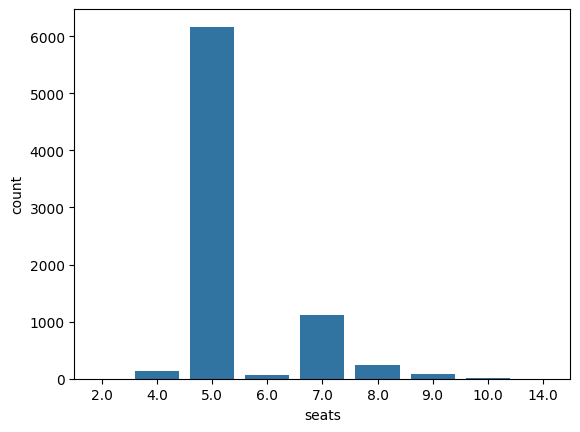

In [44]:
# Countplot - for the categorical -   most of the data is 5 seats car 
sns.countplot(data = df_eda, x = 'seats')

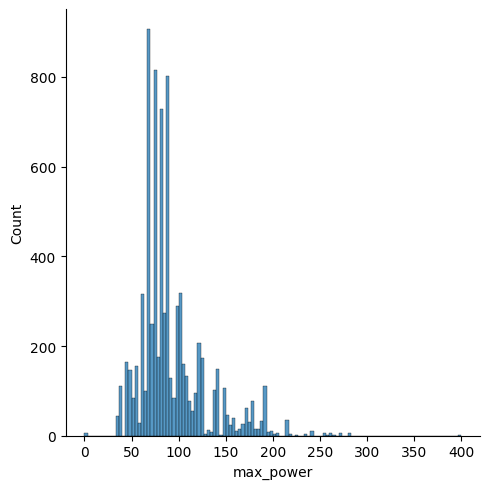

In [45]:
# Distribution plot - both categorical & continue
sns.displot(data = df_eda, x = 'max_power')

## Multivariate analysis

Text(0.5, 0, 'transmission')

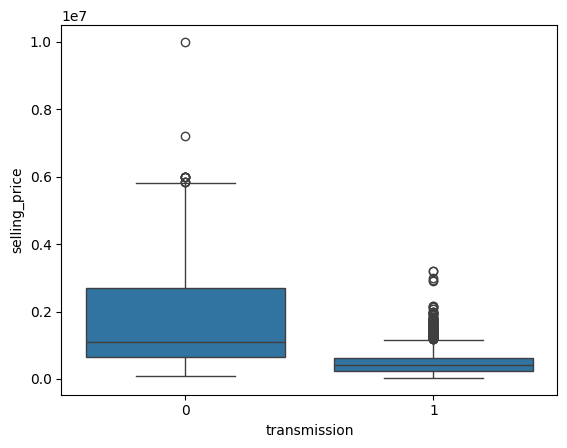

In [46]:
#Boxplot - Car transmission type 1 more selling price than type 2
sns.boxplot(x = df_eda["transmission"], y = df_eda["selling_price"]);
plt.ylabel("selling_price")
plt.xlabel("transmission")

<Axes: xlabel='year', ylabel='selling_price'>

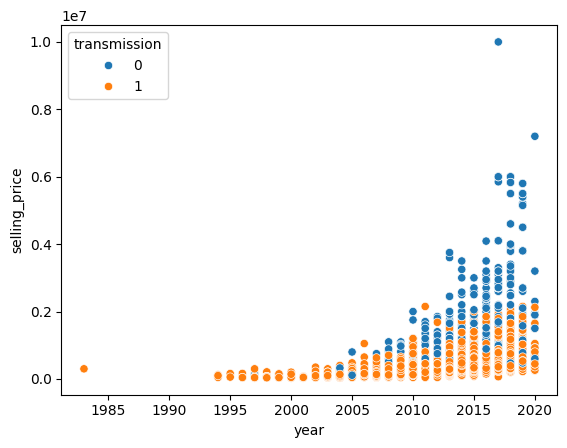

In [47]:
#Scatterplot both transmission types have increased in selling prices over the years.But the cars with transmission type "1" mostly got higher prices compared to those with type "0"
sns.scatterplot(x = df_eda['year'], y = df_eda['selling_price'], hue=df_eda['transmission'])

## Heatmap

This is the correlation matrix which use to finds the strong factor & checking whether certain feature are too correlated.

<Axes: >

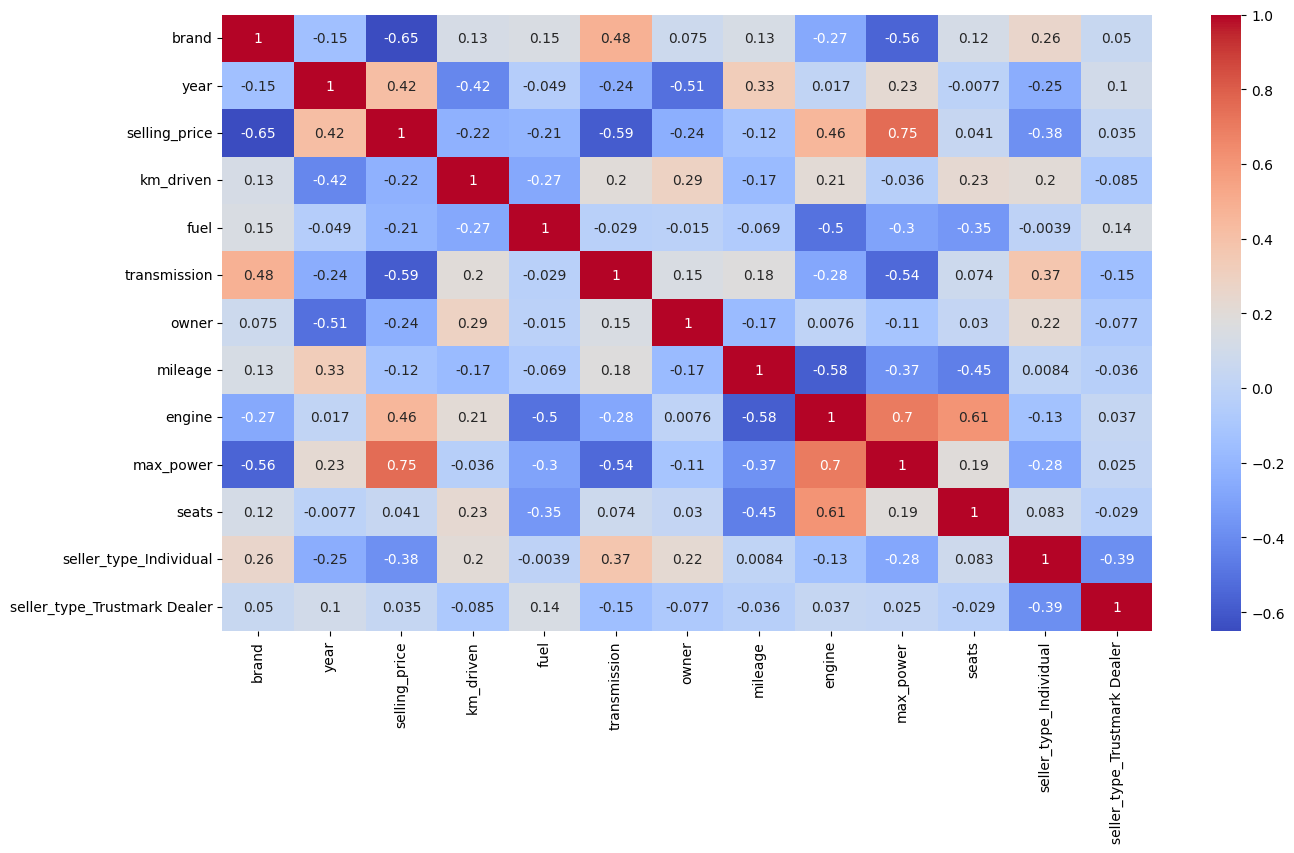

In [48]:
plt.figure(figsize = (15,8))
sns.heatmap(df_eda.corr(), annot=True, cmap="coolwarm") 

# 3. Feature Engineering

# 4.Feature Selection

## Drop the feature that not relevance

In [49]:
#drop column that not relevance (correlation number in heat map is too small)
df_selected = df_eda.drop('seats', axis='columns')

In [50]:
#Remove the feature that not effect the accuracy that much - look at part 8 (Do this after train)
df_selected = df_eda.drop(['seller_type_Trustmark Dealer', 'transmission', 'seller_type_Individual', 'fuel', 'brand', 'owner' ], axis='columns')


## Set x and y

In [51]:
#x is our strong features - No seat 
X = df_selected[[ 'year', 'km_driven', 'mileage', 'engine', 'max_power']]

#y is simply the selling_price
y = np.log(df_selected['selling_price'])

## Train test split

In [52]:
#Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

# 5. Preprocessing

## Null value - filled training set & testing set seperatly  

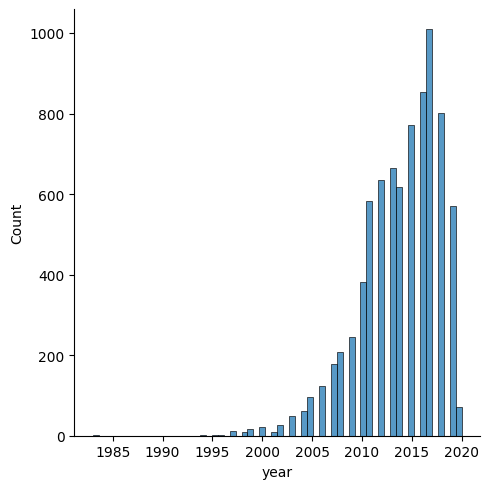

In [53]:
sns.displot(X.year)

In [54]:
#Check for null value - for selected feature
X.isnull().sum()   

year           0
km_driven      0
mileage      214
engine       214
max_power    208
dtype: int64

In [55]:
X.dtypes

year           int64
km_driven      int64
mileage      float64
engine       float64
max_power    float64
dtype: object

Fill the missing mileage data

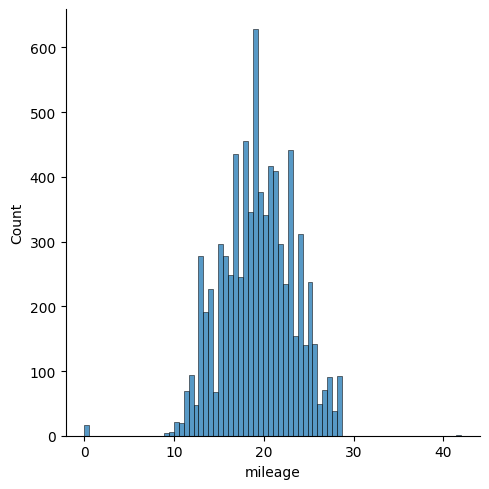

In [56]:
sns.displot(X.mileage)

In [57]:
#mileage data is normal >> fill the null with mean
X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

#Fill the testing set with the training distribution
X_test['mileage'].fillna(X_train['mileage'].mean(), inplace=True)

C:\Users\Aimmy\AppData\Local\Temp\ipykernel_27424\2250035120.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['mileage'].fillna(X_train['mileage'].mean(), inplace=True)
C:\Users\Aimmy\AppData\Local\Temp\ipykernel_27424\2250035120.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Fill the missing engine data

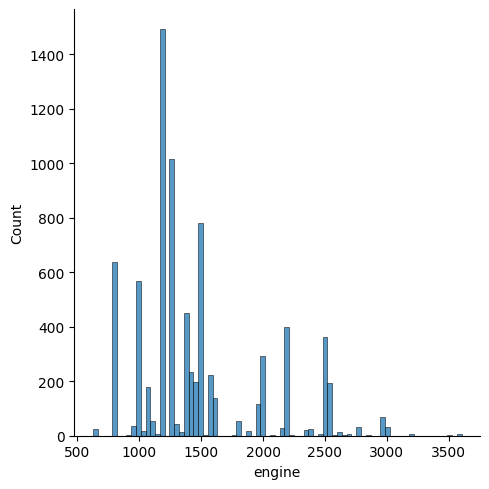

In [58]:
sns.displot(X.engine)

In [59]:
#engine data is not normal >> fill the null value with 
X_train['engine'].fillna(X_train['engine'].median(), inplace=True)

#Fill the testing set with the training distribution
X_test['engine'].fillna(X_train['engine'].median(), inplace=True)

C:\Users\Aimmy\AppData\Local\Temp\ipykernel_27424\1782278693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['engine'].fillna(X_train['engine'].median(), inplace=True)
C:\Users\Aimmy\AppData\Local\Temp\ipykernel_27424\1782278693.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

Fill the missing max_power data

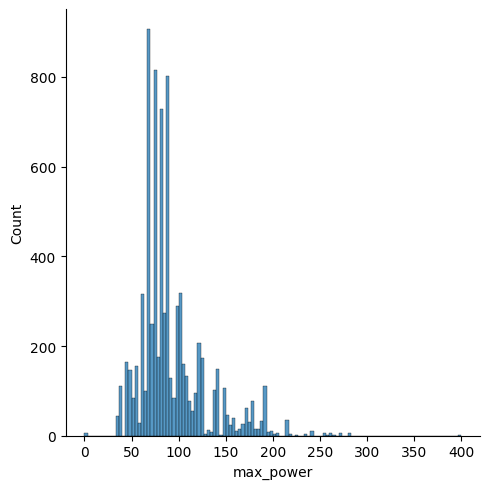

In [60]:
sns.displot(X.max_power)

In [61]:
#max_power is not normal >> fill the null valuwe with 
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

#Fill the testing set with the training distribution
X_test['max_power'].fillna(X_train['max_power'].median(), inplace=True)

C:\Users\Aimmy\AppData\Local\Temp\ipykernel_27424\4191762362.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)
C:\Users\Aimmy\AppData\Local\Temp\ipykernel_27424\4191762362.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [62]:
X_test.isnull().sum()   #Check for null value again

year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64

In [63]:
X_train.isnull().sum()   #Check for null value again

year         0
km_driven    0
mileage      0
engine       0
max_power    0
dtype: int64

In [64]:
#Check null value for y
y_train.isnull().sum(), y_test.isnull().sum()

(np.int64(0), np.int64(0))

## outlier

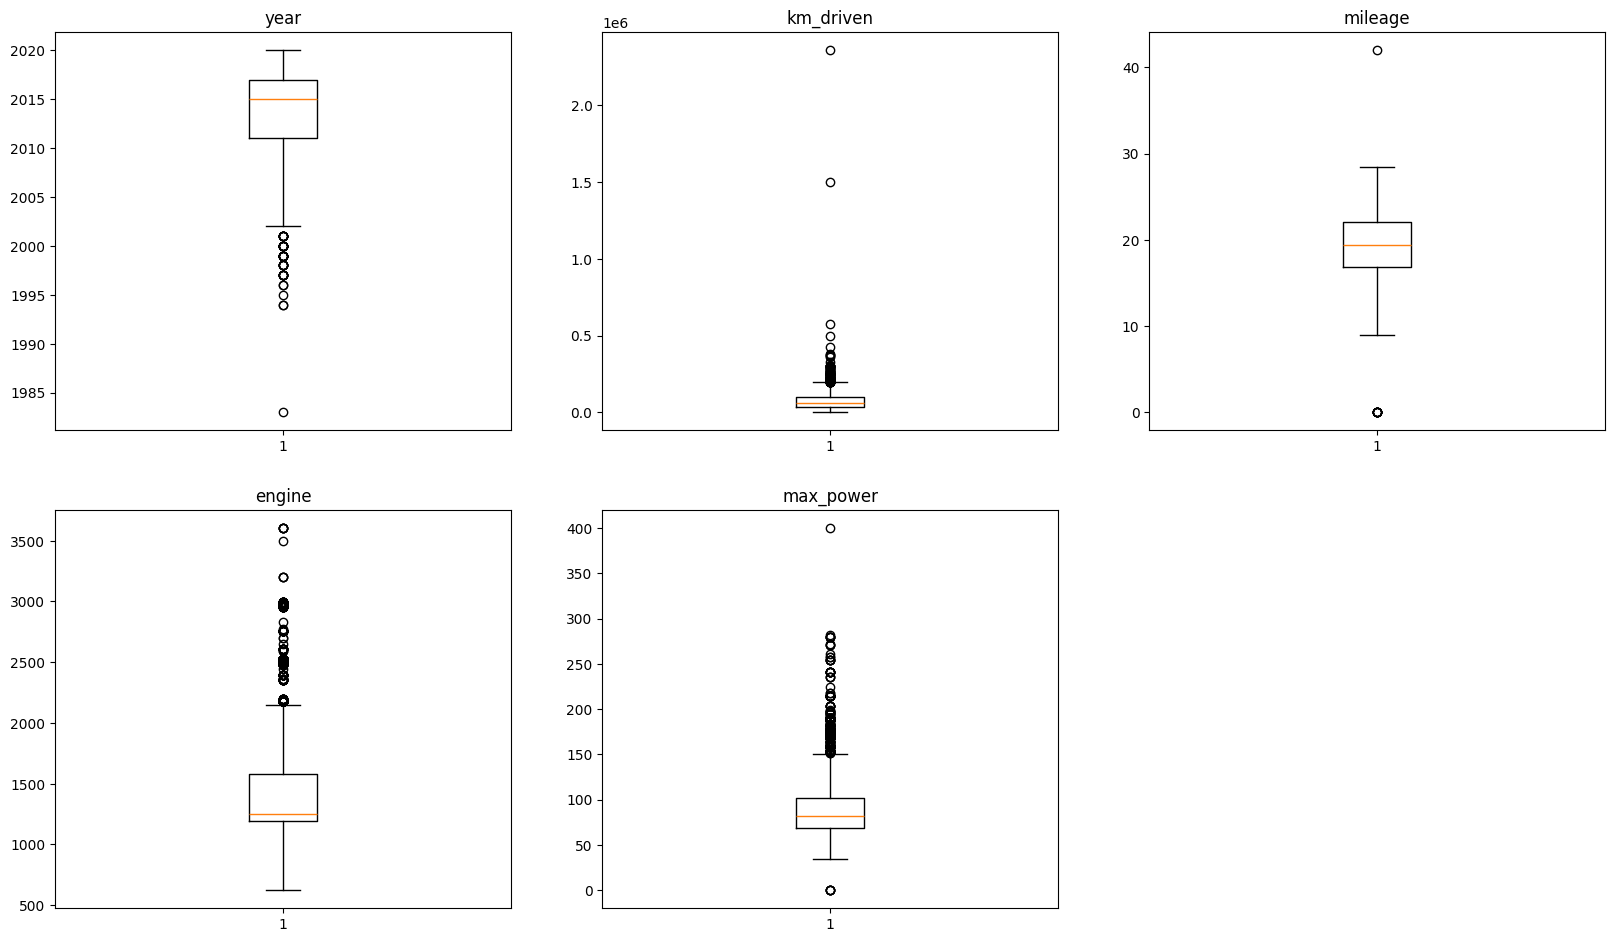

In [65]:
# Create a dictionary of columns.
col_dict = {'year':1, 'km_driven':2, 'mileage':3, 'engine':4, 'max_power':5}

# Detect outliers in each variable using box plots.
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,3,i)
                     plt.boxplot(X_train[variable])
                     plt.title(variable)

plt.show()

In [66]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [67]:
for col in X_train.columns:
    outlier_count(col)


---------------year---------------

Number of outliers: 55
Percent of data that is outlier: 0.98%

---------------km_driven---------------

Number of outliers: 107
Percent of data that is outlier: 1.9%

---------------mileage---------------

Number of outliers: 10
Percent of data that is outlier: 0.18%

---------------engine---------------

Number of outliers: 804
Percent of data that is outlier: 14.31%

---------------max_power---------------

Number of outliers: 411
Percent of data that is outlier: 7.31%


## Scaling - helps improve reach convergence faster

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [69]:
# Check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 5)
Shape of X_test:  (2409, 5)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


# 6. Modeling

### 6.1 Check shape of x & y

In [70]:
#check MSE & r2
from sklearn.linear_model import LinearRegression #we are using regression models
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

print("MSE: ", mean_squared_error(y_test, yhat))
print("r2: ", r2_score(y_test, yhat))

MSE:  0.10007026405466671
r2:  0.8531756546181197


### 6.2 Cross validation+ Grid search

#### Cross validation

In [71]:
from sklearn.linear_model import LinearRegression  #using regression models
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# models that we will be using, put them in a list
algorithms = [LinearRegression(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(random_state = 0), 
              RandomForestRegressor(n_estimators = 100, random_state = 0)]

# The names of the models
algorithm_names = ["Linear Regression", "SVR", "KNeighbors Regressor", "Decision-Tree Regressor", "Random-Forest Regressor"]

In [72]:
y_train.isna().sum()

np.int64(0)

In [73]:
from sklearn.model_selection import KFold, cross_val_score

#lists for keeping mse
train_mse = []
test_mse = []

#defining splits
kfold = KFold(n_splits=5, shuffle=True)

for i, model in enumerate(algorithms):
    scores = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
    print(f"{algorithm_names[i]} - Score: {scores}; Mean: {scores.mean()}")

Linear Regression - Score: [-0.12151313 -0.10237725 -0.10471842 -0.10115674 -0.10334402]; Mean: -0.10662190894043704
SVR - Score: [-0.06906417 -0.08274514 -0.07577706 -0.07098881 -0.07591675]; Mean: -0.07489838751634252
KNeighbors Regressor - Score: [-0.07131465 -0.07708153 -0.06759626 -0.07315836 -0.07296846]; Mean: -0.07242385100551738
Decision-Tree Regressor - Score: [-0.08682248 -0.08433341 -0.0870507  -0.08007855 -0.10162607]; Mean: -0.08798224173817785
Random-Forest Regressor - Score: [-0.05266542 -0.05139345 -0.06188015 -0.04944222 -0.05590926]; Mean: -0.054258098632397764


Random-Forest Regerssor has the heighest mean score = -0.054 which mean the best performing model.

#### Grid Search - to find the best version of that model

In [74]:
from sklearn.model_selection import GridSearchCV

param_grid = {'bootstrap': [True], 'max_depth': [5, 10, None],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 17, 19, 21]}

rf = RandomForestRegressor(random_state = 1)

grid = GridSearchCV(estimator = rf, 
                    param_grid = param_grid, 
                    cv = kfold, 
                    n_jobs = -1, 
                    return_train_score=True, 
                    refit=True,
                    scoring='neg_mean_squared_error')

# Fit your grid_search
grid.fit(X_train, y_train);  #fit means start looping all the possible parameters

In [75]:
#Evaluate our best model with mse on training & testing X
from sklearn.metrics import mean_squared_error

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    return mse

train_mse = evaluate_model(grid, X_train, y_train)
test_mse = evaluate_model(grid, X_test, y_test)
print(f"Train MSE: {train_mse:.2f}")
print(f"Test MSE: {test_mse:.2f}")

Train MSE: 0.01
Test MSE: 0.05


In [76]:
grid.best_params_

{'bootstrap': True, 'max_depth': None, 'n_estimators': 21}

In [77]:
# Find your grid_search's best score
best_mse = grid.best_score_
best_mse    # ignore the minus because it's neg_mean_squared_error

np.float64(-0.054615329573222404)

# 7. Testing -check

In [78]:
yhat = grid.predict(X_test)
mean_squared_error(y_test, yhat)

0.049315583189632126

In [79]:
# MSE for grid changing log value to normal value
yhat = grid.predict(X_test)
yhat1 = np.exp(yhat)
y_test1 = np.exp(y_test)

mean_squared_error(y_test1, yhat1)

22896121853.838352

# 8. Analysis: Feature Importance

## Algorithm way

In [80]:
#For the Random-Forest Regerssor (Best model)
rf = grid.best_estimator_
rf.feature_importances_

array([0.46603765, 0.03279113, 0.03114789, 0.05492136, 0.41510196])

<BarContainer object of 5 artists>

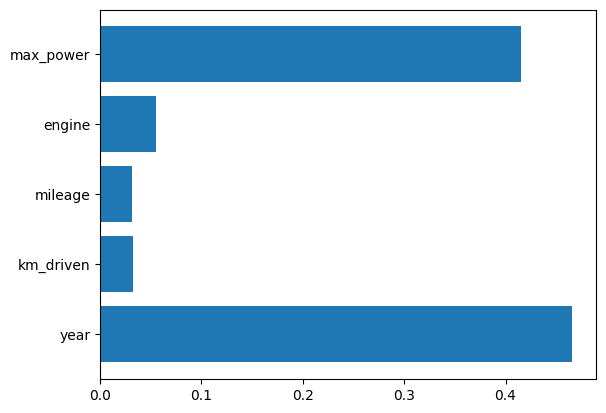

In [81]:
#plot
plt.barh(X.columns, rf.feature_importances_)   

Text(0.5, 0, 'Random Forest Feature Importance')

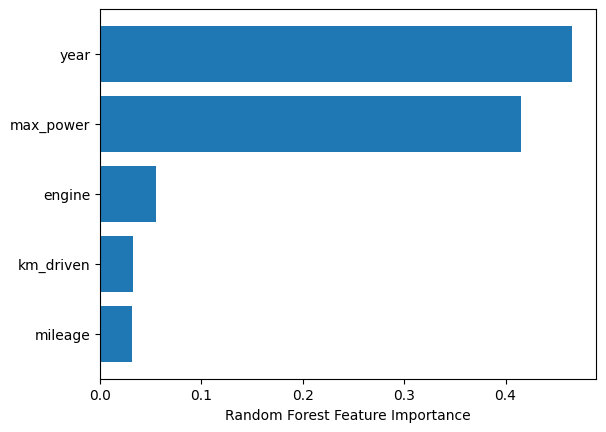

In [82]:
#Sort the plot from highest to lowest
sorted_idx = rf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

## Permutation way

Text(0.5, 0, 'Random Forest Feature Importance')

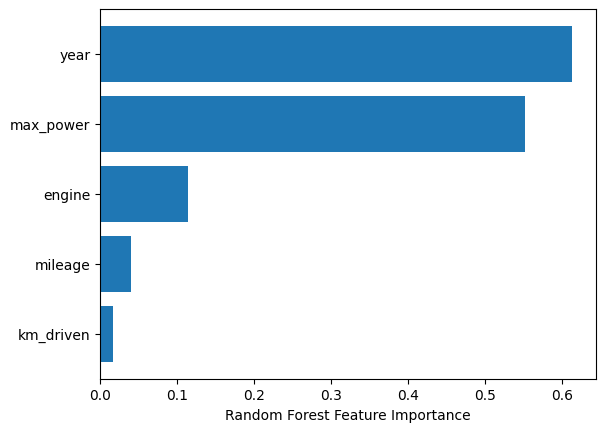

In [83]:
from sklearn.inspection import permutation_importance

perm_importance = permutation_importance(rf, X_test, y_test)

#let's plot
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(X.columns[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Random Forest Feature Importance")


## Shap way

In [84]:
import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_test)

d:\Amy\AIT\Term 2\ML\MLAssignment\A1\env_A1\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


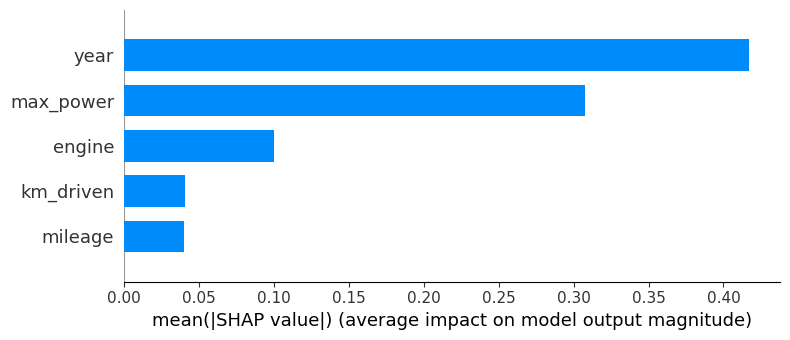

In [85]:
#shap provides plot
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names = X.columns)

# 9. Inference

In [86]:
import pickle

# save the model to disk
filename = 'model/pk_selling_price.model'
pickle.dump(grid, open(filename, 'wb'))
fileScaleName = "model/pk_scale.model"
pickle.dump(scaler, open(fileScaleName, 'wb'))

In [87]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

In [88]:
#let's try to create one silly example - row 2 from our dataset 
df[['year', 'km_driven', 'mileage', 'engine', 'max_power','selling_price']].loc[1]

year                   2014
km_driven            120000
mileage          21.14 kmpl
engine              1498 CC
max_power        103.52 bhp
selling_price        370000
Name: 1, dtype: object

In [89]:
#['year', 'km_driven', 'mileage', 'engine', 'max_power']
# New sample data
sample = np.array([[2014, 120000, 21.14, 1498, 103.52]])
# Convert sample to DataFrame with the same feature names
sample_df = pd.DataFrame(sample, columns=['year', 'km_driven', 'mileage', 'engine', 'max_power'])

In [90]:
temp = scaler.transform(sample_df)
print(temp)

[[0.05753396 0.82837845 0.44321582 0.09048466 0.33711524]]


In [91]:
predicted_selling_price = loaded_model.predict(temp)
np.exp(predicted_selling_price)

array([470362.32569277])

In [92]:
# Assuming df is your DataFrame
stats = df.agg({
    'year': 'median',
    'km_driven': 'median',
    'mileage': lambda x: pd.to_numeric(x.str.extract('(\d+\.\d+)')[0]).mean(),
    'engine': lambda x: pd.to_numeric(x.str.extract('(\d+)')[0]).median(),
    'max_power': lambda x: pd.to_numeric(x.str.extract('(\d+\.\d+|\d+)')[0]).median()
})

default_vlaue = stats.to_dict()

# To print each key and value
for key, value in default_vlaue.items():
    print(f"{key}: {value}")

    
# save the model to disk
filename = 'model/pk_default_value.model'
pickle.dump(default_vlaue, open(filename, 'wb'))



year: 2015.0
km_driven: 60000.0
mileage: 19.41878335651954
engine: 1248.0
max_power: 82.0


# Task 2 : Analysis and Report

## Which features significantly impact predictions, and which do not? Why?

Significant features:

The features significantly impacting our model predictions include year, km_driven, mileage, engine, and max_power. These were identified using rf.feature_importances_.argsort(), which sorts features based on their importance in the RandomForest model. These top five features have a significant impact on the accuracy of our predictions. Other features are less critical, which means including them might not justify the extra cost in computational resources and effort needed to collect the data.

Insignificant features:

Seats:  The correlation with the selling price is very low, showing that this feature doesn't significantly influence the price.

Name, Fuel, Seller Type, Transmission, Owner: Analysis using rf.feature_importances_.argsort() indicates that these features have a minimal impact on our model’s prediction capabilities for the selling price.

Torque: Because This feature is not well understood within the company, complicating its use in predictive analysis due to insufficient domain knowledge.

## Which algorithms performed well, and which did not? Why?

Answer: The RandomForestRegressor outperformed other models (Linear Regressio, SVR, KNeighbors Regressor and  Decision-Tree Regressor) , as evidenced by its highest (least negative) mean score from the cross-validation using negative Mean Squared Error (MSE) scores. This indicates that it is more adept at handling the dataset and predicting outcomes accurately compared to other algorithms tested.